In [1]:
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
from sklearn import preprocessing
from pandas.tseries.offsets import DateOffset

In [2]:
matplotlib.rc_file_defaults()
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,6

# Visualisation of Sentiments

## Data Prep (India)

### ACLED

In [3]:
acled = pd.read_json('acled.json')

In [4]:
acled['EVENT_DATE'] = pd.to_datetime(acled['EVENT_DATE'].astype(str), format='%Y%m%d')

In [5]:
violent = acled[(acled['EVENT_TYPE'] == 'Battles') | (acled['EVENT_TYPE'] == 'Explosions/Remote violence') | (acled['EVENT_TYPE'] == 'Violence against civilians')]
demonstrations = acled[(acled['EVENT_TYPE'] == 'Protests') | (acled['EVENT_TYPE'] == 'Riots')]
non_violent = acled[(acled['EVENT_TYPE'] == 'Strategic developments')]

In [6]:
india_demonstrations = demonstrations[(demonstrations['COUNTRY'] == 'India')]
pakistan_demonstrations = demonstrations[(demonstrations['COUNTRY'] == 'Pakistan')]
bangladesh_demonstrations = demonstrations[(demonstrations['COUNTRY'] == 'Bangladesh')]

In [7]:
india_protests = india_demonstrations[india_demonstrations['EVENT_TYPE'] == 'Protests']
india_protests_count_offset1 = india_protests.groupby(pd.Grouper(key = 'EVENT_DATE', freq = 'D')).count()
india_protests_count_offset1 = india_protests_count_offset1[['ACTOR1']]
india_protests_count_offset1.columns = ['y']
india_protests_count_offset1.index = india_protests_count_offset1.index.rename('date')
india_protests_count_offset1.index = india_protests_count_offset1.index - DateOffset(days = 1 )


india_riots = india_demonstrations[india_demonstrations['EVENT_TYPE'] == 'Riots']
india_riots_count_offset1 = india_riots.groupby(pd.Grouper(key = 'EVENT_DATE', freq = 'D')).count()
india_riots_count_offset1 = india_riots_count_offset1[['ACTOR1']]
india_riots_count_offset1.columns = ['y']
india_riots_count_offset1.index = india_riots_count_offset1.index.rename('date')
india_riots_count_offset1.index = india_riots_count_offset1.index - DateOffset(days = 1 )

In [8]:
india_demonstration_count = india_demonstrations.groupby(pd.Grouper(key = 'EVENT_DATE', freq = 'D')).count()
india_demonstration_count = india_demonstration_count[['ACTOR1']]
india_demonstration_count.columns = ['y']
india_demonstration_count.index = india_demonstration_count.index.rename('date')
india_demonstration_count.head()

y
date          
2016-01-01  15
2016-01-02  21
2016-01-03  17
2016-01-04  29
2016-01-05  33

In [9]:
india_demonstration_count_offset1 = india_demonstration_count.copy()
india_demonstration_count_offset1.index = india_demonstration_count_offset1.index - DateOffset(days = 1 )
india_demonstration_count_offset1.head()

y
date          
2015-12-31  15
2016-01-01  21
2016-01-02  17
2016-01-03  29
2016-01-04  33

In [10]:
pakistan_demonstration_count = pakistan_demonstrations.groupby(pd.Grouper(key = 'EVENT_DATE', freq = 'D')).count()
pakistan_demonstration_count = pakistan_demonstration_count[['ACTOR1']]
pakistan_demonstration_count.columns = ['y']
pakistan_demonstration_count.index = pakistan_demonstration_count.index.rename('date')

bangladesh_demonstration_count = bangladesh_demonstrations.groupby(pd.Grouper(key = 'EVENT_DATE', freq = 'D')).count()
bangladesh_demonstration_count = bangladesh_demonstration_count[['ACTOR1']]
bangladesh_demonstration_count.columns = ['y']
bangladesh_demonstration_count.index = bangladesh_demonstration_count.index.rename('date')

### News Sentiment

In [11]:
india = pd.read_json('india-news-headlines_IN_features_extracted.json').reset_index(drop = True)
# pakistan = pd.read_json('india-news-headlines_PK_features_extracted.json').reset_index(drop = True)
# bangladesh = pd.read_json('india-news-headlines_BD_features_extracted.json').reset_index(drop = True)

In [12]:
india['total articles'] = 1
india['negative articles'] = india['SA tag'].map({'POSITIVE': 0, 'NEGATIVE': 1})
india['positive articles'] = india['SA tag'].map({'POSITIVE': 1, 'NEGATIVE': 0})

In [13]:
india['date'] = pd.to_datetime(india['date'])

In [14]:
india[india['news tag'] == 'World']['title']

1                        India ready to make history: Dhoni
2                  All-religion centre planned in Bangalore
3         India; Pakistan exchange lists of nuclear inst...
4                   India eye historic series triumph in SA
6                    Day has a different meaning for Ambala
                                ...                        
399759    191 checkpoints in Bengaluru to track drunk dr...
399760    New policy: Transplant 80% of trees affected b...
399762    No Covid casualty in 7 dists of Vidarbha; reco...
399763              Cops rescue trafficked girls from Bihar
399764    25% of four-wheelers in Karnataka yet to get F...
Name: title, Length: 298086, dtype: object

In [15]:
india[india['news tag'] == 'Business']['title']

0         Do you agree that the increase in fine from Rs...
10                     Truck terminal to come up in Dharwad
22                    Consumption key to India growth story
25                  India bank on Gary's Newlands knowledge
27        Great NY start for Ahmedabad hotels; bookings ...
                                ...                        
399749    Andhra Pradesh: Conviction rate shoots up in C...
399750    Random Cov testing on cards at picnic spots in...
399751    Covid-19 recovery rate close to 99% in Andhra ...
399756             Frost hits Ajmer region; farmers alerted
399758    CBI registers 1st case in Maharashtra after GC...
Name: title, Length: 55810, dtype: object

In [16]:
india[india['news tag'] == 'Sci/Tech']['title']

19                     Assam journalists to get laptop free
31        Electronic surveillance of Karnataka's coastli...
55                   India's first online social TV network
81        ECI votes for GEL's new electoral roll managem...
122                 North India shivers as mercury plummets
                                ...                        
399705    Patna: Online education the order of the day i...
399707     200+ new Covid cases in Bhopal; 193 more recover
399732      Ahmedabad: Bootleggers bet on 180ml to sneak by
399745    IT giants powered from remote villages of Andh...
399752    Kolkata municipal corporation to go online wit...
Name: title, Length: 28392, dtype: object

In [17]:
india[india['news tag'] == 'Sports']['title']

5         Skipper Dhoni says; India ready to make histor...
21          Vishnu upsets Niland in Chennai Open qualifiers
26                    Three-wheeling from Chennai to Kerala
37                     Kolkata Horse Show to begin tomorrow
44         Bye bye 2010; Delhi rings in New Year with gusto
                                ...                        
399657    Mumbai: New Year revellers to stay indoors ton...
399682    14 flyers from UK test +ve in Maharashtra; 8 o...
399684    4 more from Karnataka test positive for new Co...
399740    Delhi HC extends interim bail of Unitech MD on...
399761    Cleanest in 3 yrs: Delhi had 192 'good air' da...
Name: title, Length: 17477, dtype: object

In [18]:
india['weighted negative'] = india['SA tag confidence'] * india['negative articles']
india['weighted positive'] = india['SA tag confidence'] * india['positive articles']

In [19]:
test = india.groupby(['news tag', pd.Grouper(key = 'date', freq = '1D')]).sum()

In [20]:
test['Sentiment Index'] = test['negative articles'] / test['total articles']
test['Sentiment Index'].fillna(0)
test

news tag confidence  SA tag confidence  total articles  \
news tag date                                                                 
Business 2011-01-01             5.141795           5.945882               6   
         2011-01-02             5.103329           5.963824               6   
         2011-01-03             4.471473           4.967253               5   
         2011-01-04             6.162693           7.944288               8   
         2011-01-05             8.847018          10.945851              11   
...                                  ...                ...             ...   
World    2020-12-27           130.000023         140.469549             142   
         2020-12-28           106.353588         115.149630             116   
         2020-12-29            96.708261         106.354405             107   
         2020-12-30           120.777811         130.851218             132   
         2020-12-31           105.484770         113.026830             114   

                     negative articles  positive articles  weighted negative  \
news tag date                                                                  
Business 2011-01-01                  2                  4           1.965429   
         2011-01-02                  4                  2           3.968380   
         2011-01-03                  2                  3           1.982078   
         2011-01-04                  3                  5           2.995207   
         2011-01-05                  2                  9           1.990538   
...                                ...                ...                ...   
World    2020-12-27                 83                 59          82.153330   
         2020-12-28                 61                 55          60.564693   
         2020-12-29                 53                 54          52.729863   
         2020-12-30                 85                 47          84.390409   
         2020-12-31                 75                 39          74.458643   

                     weighted positive  Sentiment Index  
news tag date                                            
Business 2011-01-01           3.980453         0.333333  
         2011-01-02           1.995444         0.666667  
         2011-01-03           2.985175         0.400000  
         2011-01-04           4.949081         0.375000  
         2011-01-05           8.955313         0.181818  
...                                ...              ...  
World    2020-12-27          58.316219         0.584507  
         2020-12-28          54.584937         0.525862  
         2020-12-29          53.624542         0.495327  
         2020-12-30          46.460809         0.643939  
         2020-12-31          38.568187         0.657895  

[14534 rows x 8 columns]

In [21]:
test.loc[('Sci/Tech', '2016-01-01')]

news tag confidence    4.924190
SA tag confidence      5.979872
total articles         6.000000
negative articles      1.000000
positive articles      5.000000
weighted negative      0.997674
weighted positive      4.982198
Sentiment Index        0.166667
Name: (Sci/Tech, 2016-01-01 00:00:00), dtype: float64

In [22]:
print('Number of days with World articles about India: {}'.format(test.loc['World'].shape[0]))
print('Number of days with ACLED records on India: {}'.format(india_demonstration_count.shape[0]))

Number of days with World articles about India: 3653
Number of days with ACLED records on India: 1759


In [23]:
india_visualise_world = (pd.merge(test.loc['World'].asfreq('D'), india_demonstration_count.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_visualise_business = (pd.merge(test.loc['Business'].asfreq('D'), india_demonstration_count.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_visualise_sci = (pd.merge(test.loc['Sci/Tech'].asfreq('D'), india_demonstration_count.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_visualise_sports = (pd.merge(test.loc['Sports'].asfreq('D'), india_demonstration_count.asfreq('D'), left_index=True, right_index=True)).fillna(0)

In [24]:
india_visualise_sports.isnull().sum()

news tag confidence    0
SA tag confidence      0
total articles         0
negative articles      0
positive articles      0
weighted negative      0
weighted positive      0
Sentiment Index        0
y                      0
dtype: int64

In [25]:
india_dfs = [[india_visualise_world, 'World'], [india_visualise_business, 'Business'], [india_visualise_sci, 'Sci/Tech'], [india_visualise_sports, 'Sports']]

In [26]:
india_visualise_world

news tag confidence  SA tag confidence  total articles  \
date                                                                 
2016-01-01            69.040127          71.615958              72   
2016-01-02            68.304356          73.619873              75   
2016-01-03            89.600135          95.188165              96   
2016-01-04            68.591397          72.063326              73   
2016-01-05            74.486332          80.421574              81   
...                         ...                ...             ...   
2020-10-20           109.536014         117.789147             119   
2020-10-21           111.520118         122.850160             124   
2020-10-22           117.488072         127.928109             129   
2020-10-23           109.649621         118.308189             119   
2020-10-24           107.917150         117.810973             119   

            negative articles  positive articles  weighted negative  \
date                                                                  
2016-01-01                 34                 38          33.768819   
2016-01-02                 34                 41          33.028503   
2016-01-03                 49                 47          48.602636   
2016-01-04                 43                 30          42.169100   
2016-01-05                 46                 35          45.585638   
...                       ...                ...                ...   
2020-10-20                 70                 49          69.201685   
2020-10-21                 72                 52          71.180691   
2020-10-22                 82                 47          81.443854   
2020-10-23                 80                 39          79.501156   
2020-10-24                 72                 47          71.144898   

            weighted positive  Sentiment Index   y  
date                                                
2016-01-01          37.847139         0.472222  15  
2016-01-02          40.591370         0.453333  21  
2016-01-03          46.585529         0.510417  17  
2016-01-04          29.894226         0.589041  29  
2016-01-05          34.835936         0.567901  33  
...                       ...              ...  ..  
2020-10-20          48.587462         0.588235  48  
2020-10-21          51.669469         0.580645  41  
2020-10-22          46.484254         0.635659  24  
2020-10-23          38.807033         0.672269  26  
2020-10-24          46.666075         0.605042  11  

[1759 rows x 9 columns]

In [27]:
india_visualise_world_offset_1 = (pd.merge(test.loc['World'].asfreq('D'), india_demonstration_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_visualise_business_offset_1 = (pd.merge(test.loc['Business'].asfreq('D'), india_demonstration_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_visualise_sci_offset_1 = (pd.merge(test.loc['Sci/Tech'].asfreq('D'), india_demonstration_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_visualise_sports_offset_1 = (pd.merge(test.loc['Sports'].asfreq('D'), india_demonstration_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)

india_dfs_offset_1 = [[india_visualise_world_offset_1, 'World'], [india_visualise_business_offset_1, 'Business'], [india_visualise_sci_offset_1, 'Sci/Tech'], [india_visualise_sports_offset_1, 'Sports']]

In [28]:
india_protests_world_offset_1 = (pd.merge(test.loc['World'].asfreq('D'), india_protests_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_protests_business_offset_1 = (pd.merge(test.loc['Business'].asfreq('D'), india_protests_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_protests_sci_offset_1 = (pd.merge(test.loc['Sci/Tech'].asfreq('D'), india_protests_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_protests_sports_offset_1 = (pd.merge(test.loc['Sports'].asfreq('D'), india_protests_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)

india_protests_dfs_offset_1 = [[india_protests_world_offset_1, 'World'], [india_protests_business_offset_1, 'Business'], [india_protests_sci_offset_1, 'Sci/Tech'], [india_protests_sports_offset_1, 'Sports']]

In [29]:
india_riots_world_offset_1 = (pd.merge(test.loc['World'].asfreq('D'), india_riots_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_riots_business_offset_1 = (pd.merge(test.loc['Business'].asfreq('D'), india_riots_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_riots_sci_offset_1 = (pd.merge(test.loc['Sci/Tech'].asfreq('D'), india_riots_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
india_riots_sports_offset_1 = (pd.merge(test.loc['Sports'].asfreq('D'), india_riots_count_offset1.asfreq('D'), left_index=True, right_index=True)).fillna(0)

india_riots_dfs_offset_1 = [[india_riots_world_offset_1, 'World'], [india_riots_business_offset_1, 'Business'], [india_riots_sci_offset_1, 'Sci/Tech'], [india_riots_sports_offset_1, 'Sports']]

## Graphs (India)

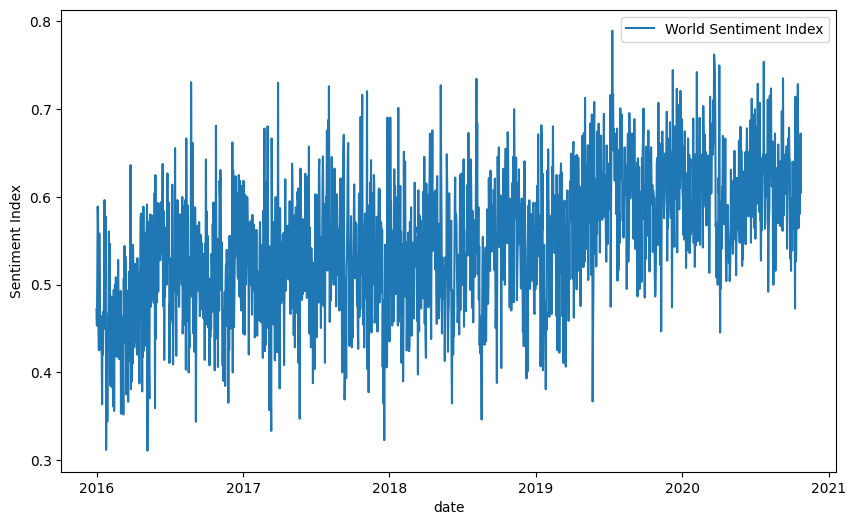

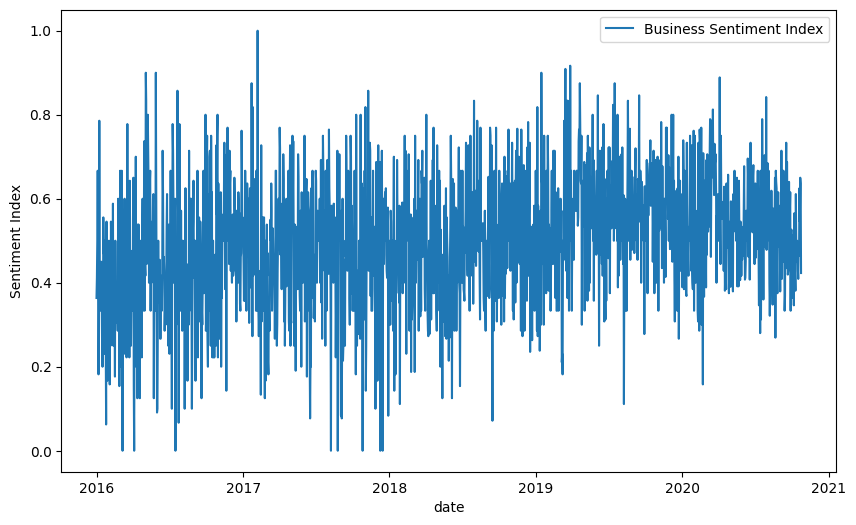

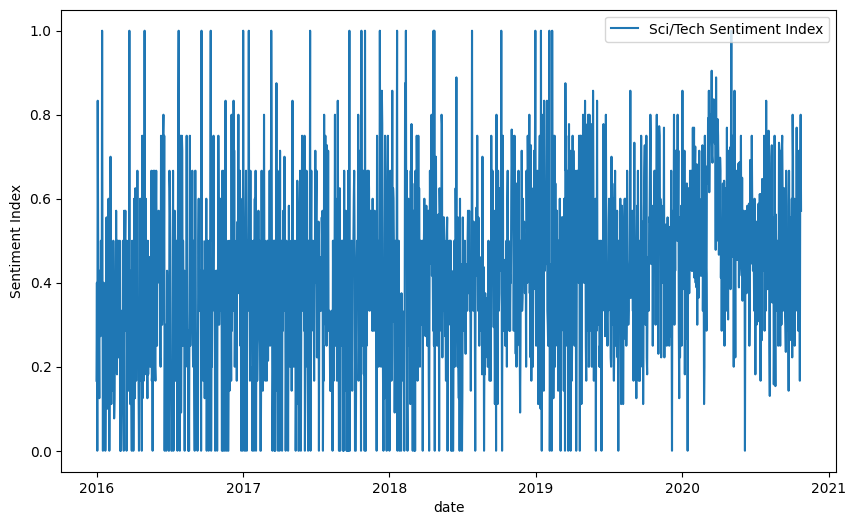

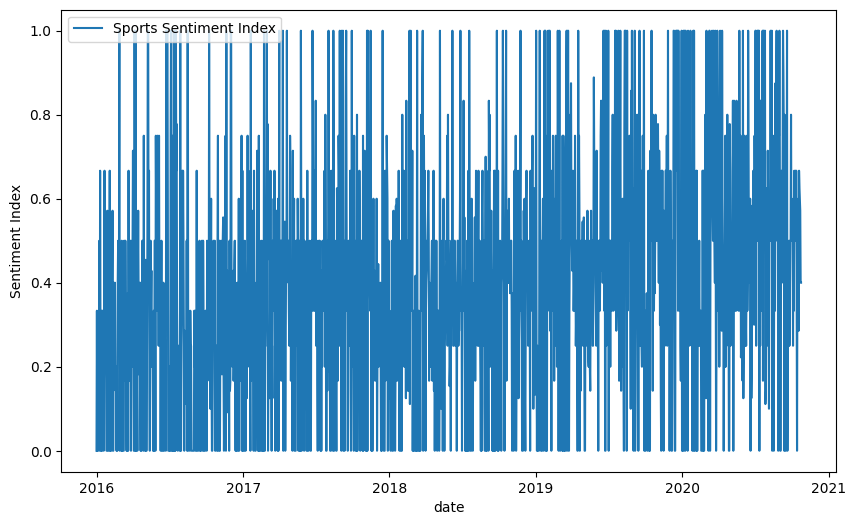

In [30]:
for df, text in india_dfs:
    sns.lineplot(data = df, x = 'date', y = 'Sentiment Index', label = text + ' Sentiment Index')
    plt.show()

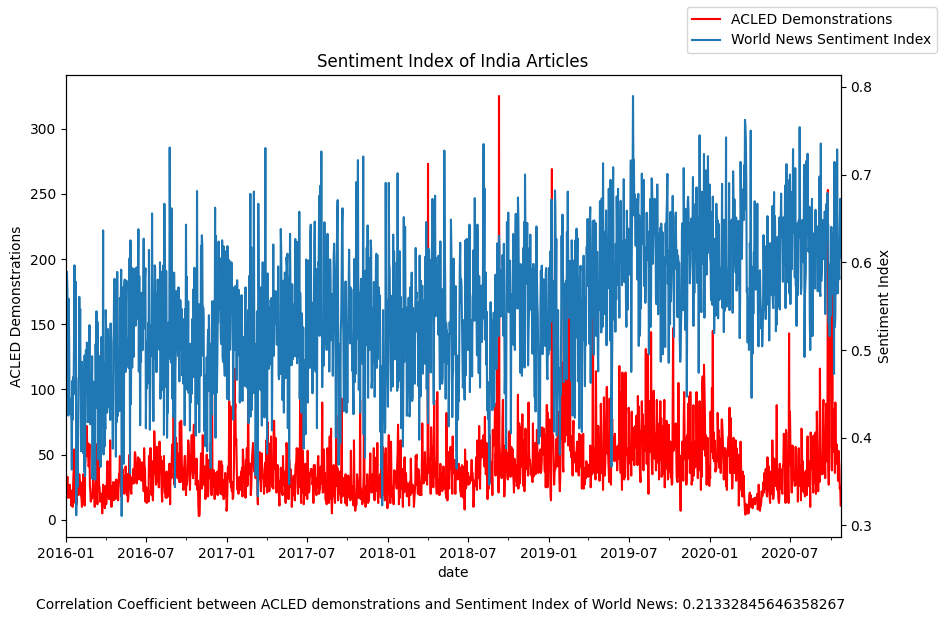

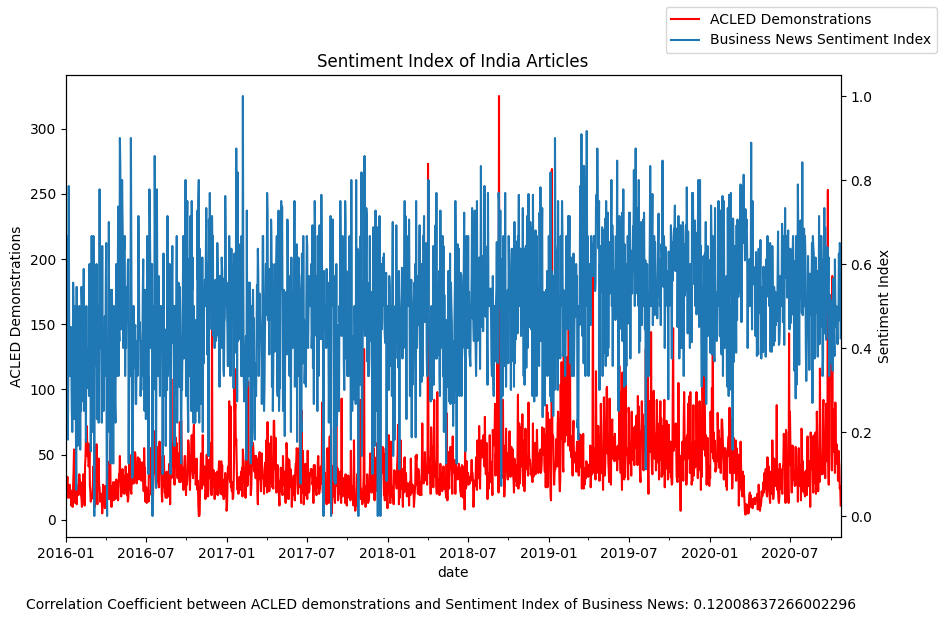

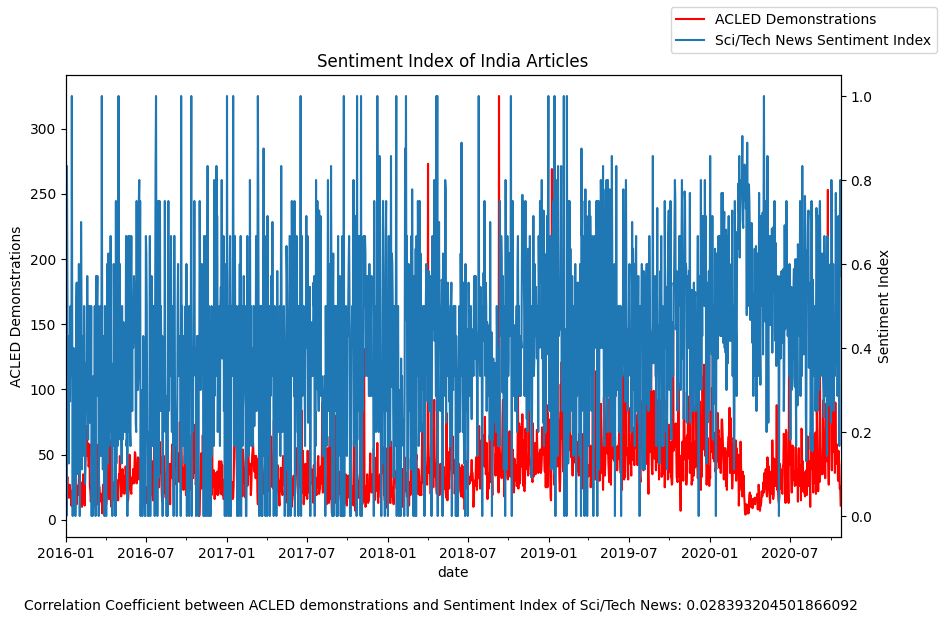

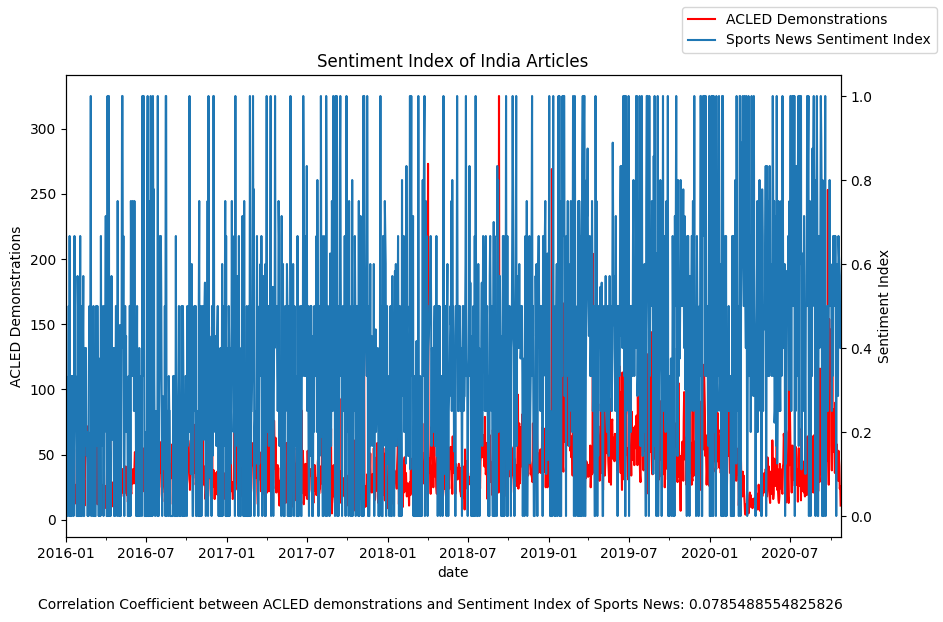

In [31]:
for df, text in india_dfs:
    ax = india_demonstration_count.plot(y='y', color = 'r', label = 'ACLED Demonstrations', legend = False, figsize = [10,6])
    plt.ylabel('ACLED Demonstrations')

    ax2=ax.twinx()
    plt.plot(df.index,df['Sentiment Index'],label = text + ' News Sentiment Index')
    txt = "Correlation Coefficient between ACLED demonstrations and Sentiment Index of {} News: {}".format(text, df['y'].corr(df['Sentiment Index']))
    # plt.plot(india_business.index,india_business['Sentiment Index'],label = 'Business News Sentiment Index')
    # plt.plot(india_sci.index,india_sci['Sentiment Index'],label = 'Sci/Tech News Sentiment Index')
    # plt.plot(india_sports.index,india_sports['Sentiment Index'],label = 'Sports News Sentiment Index')
    plt.ylabel('Sentiment Index')

    ax.figure.legend()
    plt.title('Sentiment Index of India Articles')
    plt.figtext(0.5, -.01,txt, ha = 'center')
    plt.grid(False)
    plt.show()



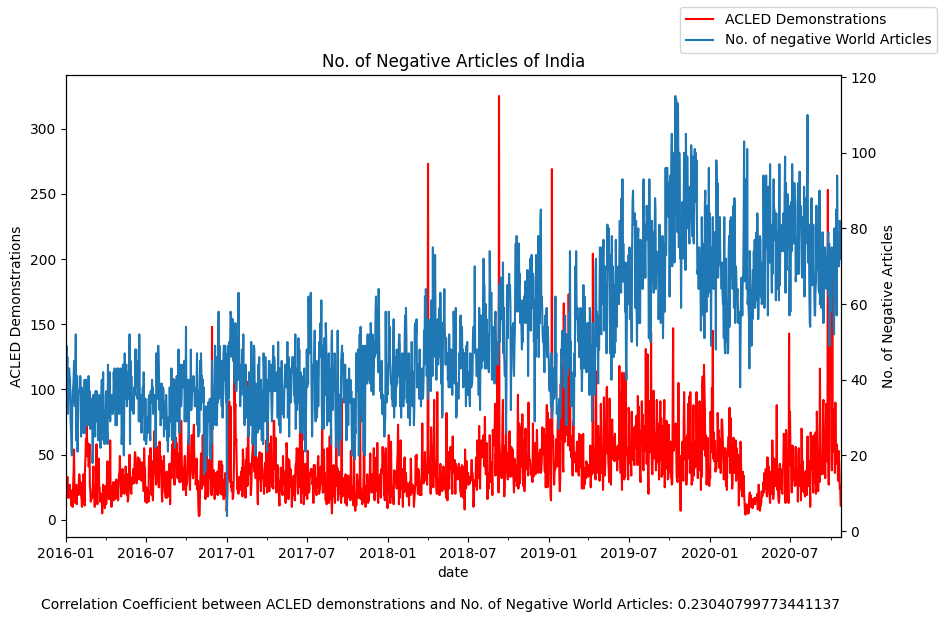

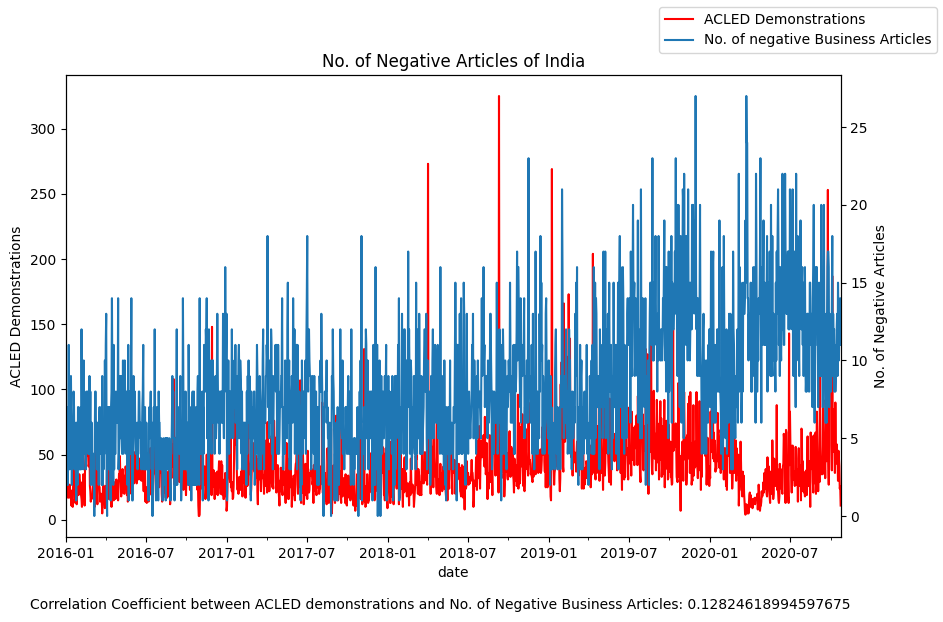

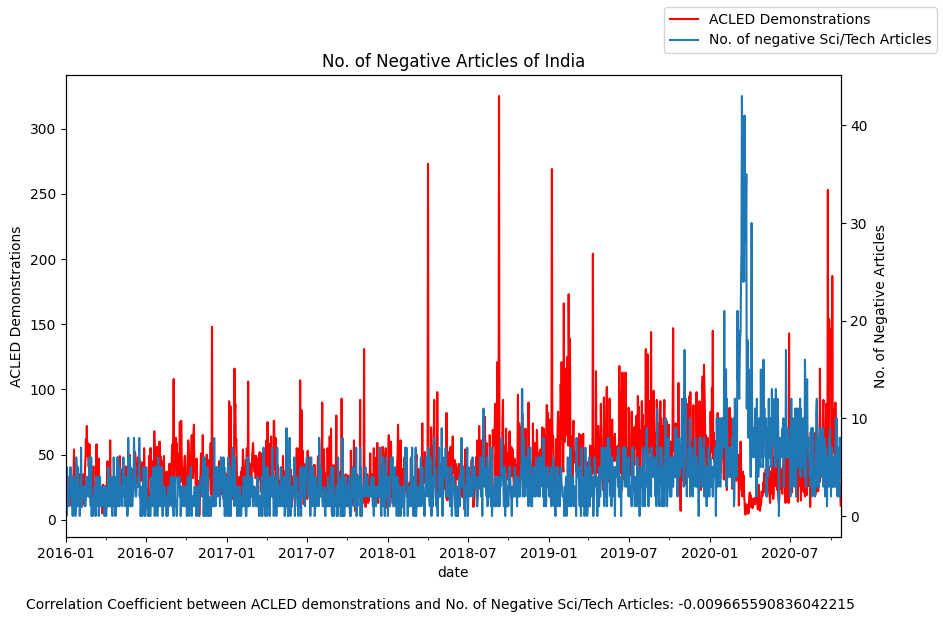

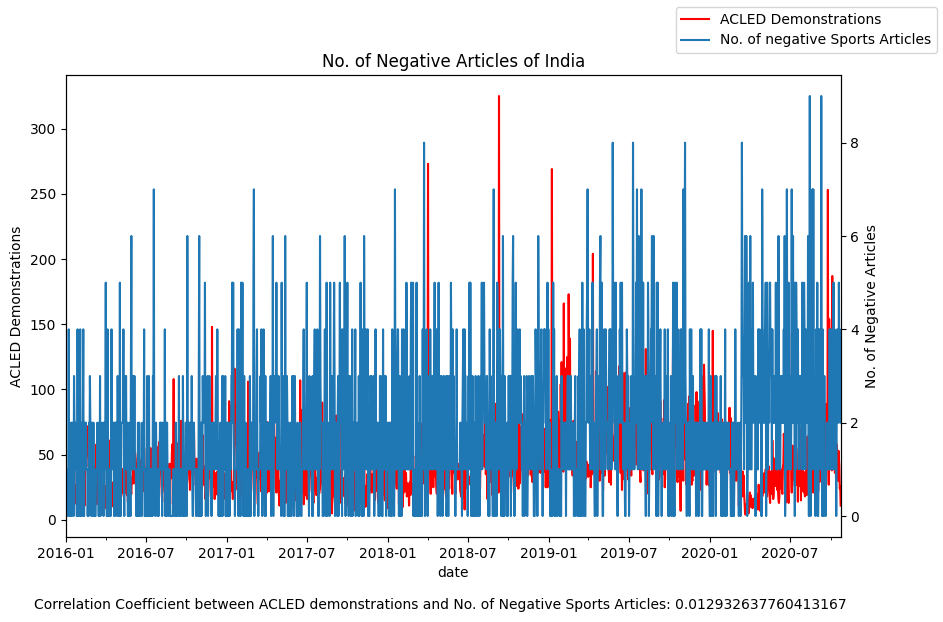

In [32]:
for df, text in india_dfs:
    ax = india_demonstration_count.plot(y='y', color = 'r', label = 'ACLED Demonstrations', legend = False, figsize = [10,6])
    plt.ylabel('ACLED Demonstrations')

    ax2=ax.twinx()
    plt.plot(df.index,df['negative articles'],label = 'No. of negative ' + text + ' Articles')
    txt = "Correlation Coefficient between ACLED demonstrations and No. of Negative {} Articles: {}".format(text, df['y'].corr(df['negative articles']))
    # plt.plot(india_business.index,india_business['Sentiment Index'],label = 'Business News Sentiment Index')
    # plt.plot(india_sci.index,india_sci['Sentiment Index'],label = 'Sci/Tech News Sentiment Index')
    # plt.plot(india_sports.index,india_sports['Sentiment Index'],label = 'Sports News Sentiment Index')
    plt.ylabel('No. of Negative Articles')

    ax.figure.legend()
    plt.title('No. of Negative Articles of India')
    plt.figtext(0.5, -.01,txt, ha = 'center')
    plt.grid(False)
    plt.show()


In [33]:
india_visualise_sci[india_visualise_sci['negative articles'] > 30]

news tag confidence  SA tag confidence  total articles  \
date                                                                 
2020-03-14            44.221679          53.376269            54.0   
2020-03-15            35.266359          41.789593            42.0   
2020-03-16            37.474990          46.748525            47.0   
2020-03-20            42.791702          48.845697            49.0   
2020-03-22            34.102779          39.789737            40.0   
2020-03-24            39.455688          44.679205            45.0   

            negative articles  positive articles  weighted negative  \
date                                                                  
2020-03-14               43.0               11.0          42.523515   
2020-03-15               38.0                4.0          37.823040   
2020-03-16               33.0               14.0          32.830443   
2020-03-20               41.0                8.0          40.879028   
2020-03-22               32.0                8.0          31.827945   
2020-03-24               35.0               10.0          34.799417   

            weighted positive  Sentiment Index   y  
date                                                
2020-03-14          10.852754         0.796296  23  
2020-03-15           3.966553         0.904762  18  
2020-03-16          13.918082         0.702128  37  
2020-03-20           7.966668         0.836735  14  
2020-03-22           7.961792         0.800000   4  
2020-03-24           9.879788         0.777778  12

In [34]:
pd.set_option('display.max_colwidth', None)
india[(india['news tag'] == 'Sci/Tech') & (india['date'] == '2020-03-14')]['title']

350902                           Coronavirus scare in Jaipur: JMC staff told to identify buildings to treat patients
350905                      Pune district admin to track 170 people visiting coronavirus-hit countries in past month
350906          Coronavirus scare in Delhi: Tihar Jail quarantines new inmates for three days before allotting cells
350908                         Coronavirus scare: All charity hospitals in Pune told to set up quarantine facilities
350911                                                Coronavirus scare in Pune: Many schools cancel non-board exams
350916                                    Student back from US gets infection; 10 coronavirus cases in Pune district
350931                Hit hard by coronavirus; travel industry in Coimbatore faces its worst crisis in three decades
350933                                   Gujarat: 65 quarantined for their contact with 7 coronavirus positive cases
350934                                             Fewer cases; 

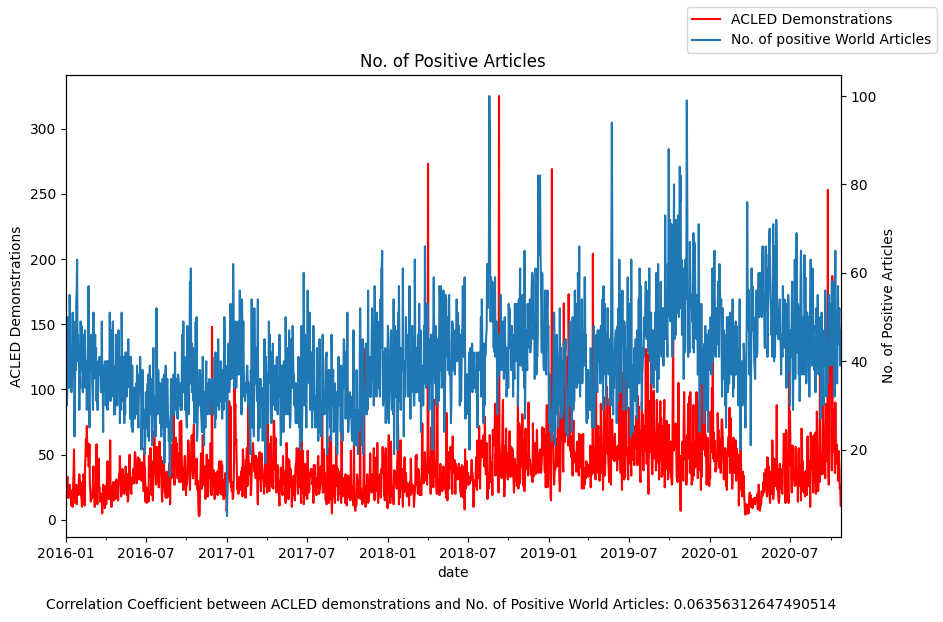

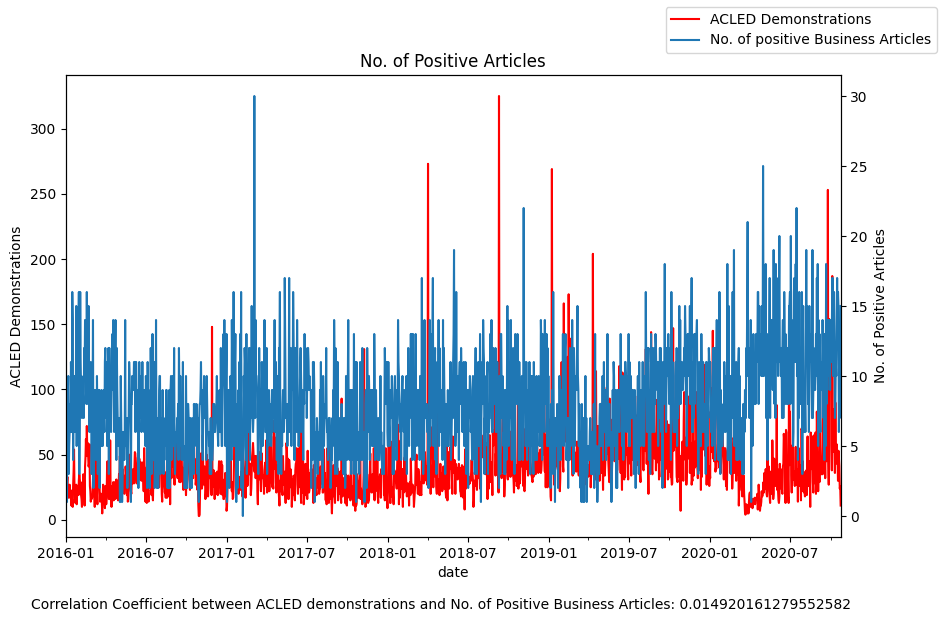

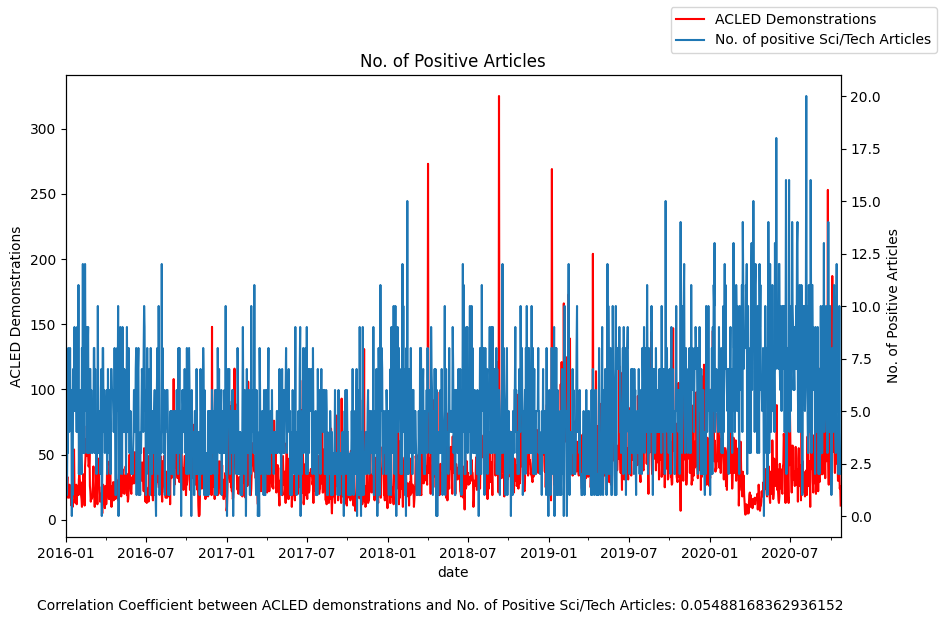

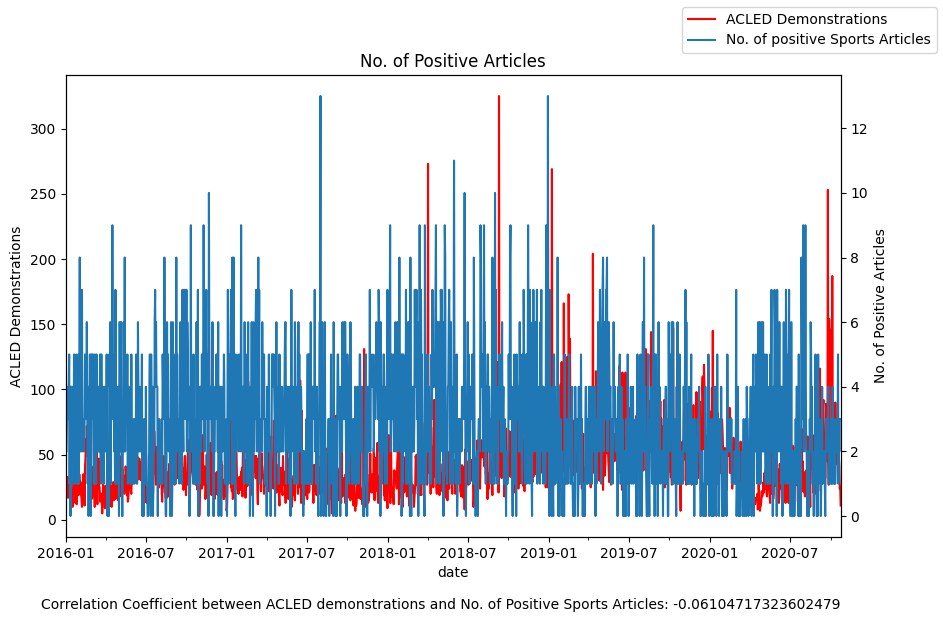

In [35]:
 for df, text in india_dfs:
    ax = india_demonstration_count.plot( y='y', color = 'r', label = 'ACLED Demonstrations', legend = False, figsize = [10,6])
    plt.ylabel('ACLED Demonstrations')

    ax2=ax.twinx()
    plt.plot(df.index,df['positive articles'],label = 'No. of positive ' + text + ' Articles')
    txt = "Correlation Coefficient between ACLED demonstrations and No. of Positive {} Articles: {}".format(text, df['y'].corr(df['positive articles']))
    # plt.plot(india_business.index,india_business['Sentiment Index'],label = 'Business News Sentiment Index')
    # plt.plot(india_sci.index,india_sci['Sentiment Index'],label = 'Sci/Tech News Sentiment Index')
    # plt.plot(india_sports.index,india_sports['Sentiment Index'],label = 'Sports News Sentiment Index')
    plt.ylabel('No. of Positive Articles')

    ax.figure.legend()
    plt.title('No. of Positive Articles')
    plt.figtext(0.5, -.01,txt, ha = 'center')
    plt.grid(False)
    plt.show()

In [36]:
for df, text in india_dfs_offset_1:
    print("Corr between Sentiment Index of {} articles today & ACLED Demonstration records the next day: {}".format(text, df['y'].corr(df['Sentiment Index'])))

print("\n")

for df, text in india_protests_dfs_offset_1:
    print("Corr between Sentiment Index of {} articles today & ACLED Protests records the next day: {}".format(text, df['y'].corr(df['Sentiment Index'])))

print("\n")

for df, text in india_riots_dfs_offset_1:
    print("Corr between Sentiment Index of {} articles today & ACLED Riots records the next day: {}".format(text, df['y'].corr(df['Sentiment Index'])))

Corr between Sentiment Index of World articles today & ACLED Demonstration records the next day: 0.13767441243455714
Corr between Sentiment Index of Business articles today & ACLED Demonstration records the next day: 0.10942850656793741
Corr between Sentiment Index of Sci/Tech articles today & ACLED Demonstration records the next day: 0.04422259332302701
Corr between Sentiment Index of Sports articles today & ACLED Demonstration records the next day: 0.02631805790550488


Corr between Sentiment Index of World articles today & ACLED Protests records the next day: 0.13210691045503287
Corr between Sentiment Index of Business articles today & ACLED Protests records the next day: 0.08262048934802921
Corr between Sentiment Index of Sci/Tech articles today & ACLED Protests records the next day: 0.035896266111188346
Corr between Sentiment Index of Sports articles today & ACLED Protests records the next day: 0.024318670761366748


Corr between Sentiment Index of World articles today & ACLED Rio

## Data Prep (Pakistan)

### News Sentiment

In [37]:
# india = pd.read_json('india-news-headlines_IN_features_extracted.json').reset_index(drop = True)
pakistan = pd.read_json('india-news-headlines_PK_features_extracted.json').reset_index(drop = True)
# bangladesh = pd.read_json('india-news-headlines_BD_features_extracted.json').reset_index(drop = True)

In [38]:
pakistan['total articles'] = 1
pakistan['negative articles'] = pakistan['SA tag'].map({'POSITIVE': 0, 'NEGATIVE': 1})
pakistan['positive articles'] = pakistan['SA tag'].map({'POSITIVE': 1, 'NEGATIVE': 0})

In [39]:
pakistan['date'] = pd.to_datetime(pakistan['date'])

In [40]:
pakistan['weighted negative'] = pakistan['SA tag confidence'] * pakistan['negative articles']
pakistan['weighted positive'] = pakistan['SA tag confidence'] * pakistan['positive articles']

In [41]:
test = pakistan.groupby(['news tag', pd.Grouper(key = 'date', freq = '1D')]).sum()
test['Sentiment Index'] = test['negative articles'] / test['total articles']
test['Sentiment Index'].fillna(0)

news tag  date      
Business  2011-01-03    1.0
          2011-01-08    1.0
          2011-01-10    1.0
          2011-01-11    1.0
          2011-01-13    0.0
                       ... 
World     2020-12-24    1.0
          2020-12-25    1.0
          2020-12-26    1.0
          2020-12-29    0.5
          2020-12-31    1.0
Name: Sentiment Index, Length: 3979, dtype: float64

In [42]:
print('Number of days with World articles about Pakistan: {}'.format(test.loc['World'].shape[0]))
print('Number of days with ACLED records on Pakistan: {}'.format(pakistan_demonstration_count.shape[0]))

# A lot more days with no world articles compared to days without ACLED records.

Number of days with World articles about Pakistan: 3094
Number of days with ACLED records on Pakistan: 3531


In [43]:
pakistan_demonstration_count.head()

y
date          
2011-02-24  16
2011-02-25   5
2011-02-26  11
2011-02-27   6
2011-02-28   1

In [44]:
pakistan_visualise_world = (pd.merge(test.loc['World'].asfreq('D'), pakistan_demonstration_count, left_index=True, right_index=True)).fillna(0)
pakistan_visualise_business = (pd.merge(test.loc['Business'].asfreq('D'), pakistan_demonstration_count, left_index=True, right_index=True)).fillna(0)
pakistan_visualise_sci = (pd.merge(test.loc['Sci/Tech'].asfreq('D'), pakistan_demonstration_count, left_index=True, right_index=True)).fillna(0)
pakistan_visualise_sports = (pd.merge(test.loc['Sports'].asfreq('D'), pakistan_demonstration_count, left_index=True, right_index=True)).fillna(0)

In [45]:
pakistan_visualise_world.shape[0]

3531

In [46]:
pakistan_dfs = [[pakistan_visualise_world, 'World'], [pakistan_visualise_business, 'Business'], [pakistan_visualise_sci, 'Sci/Tech'], [pakistan_visualise_sports, 'Sports']]

## Graphs (Pakistan)

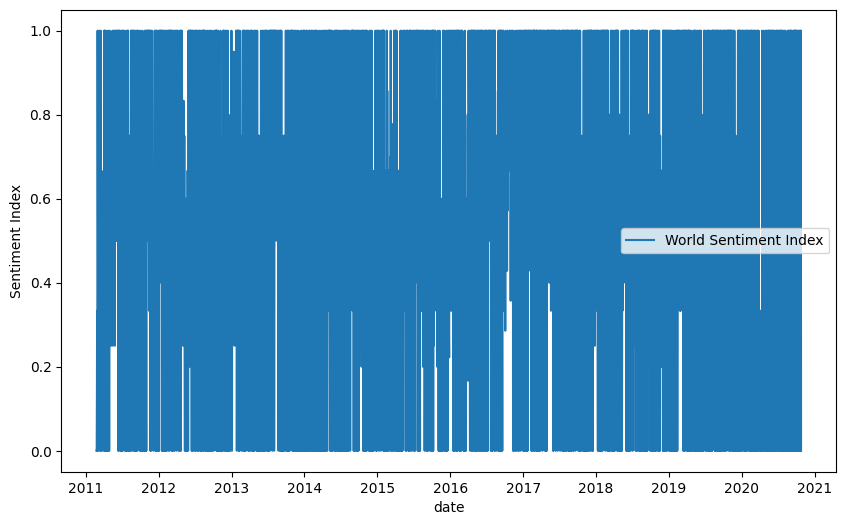

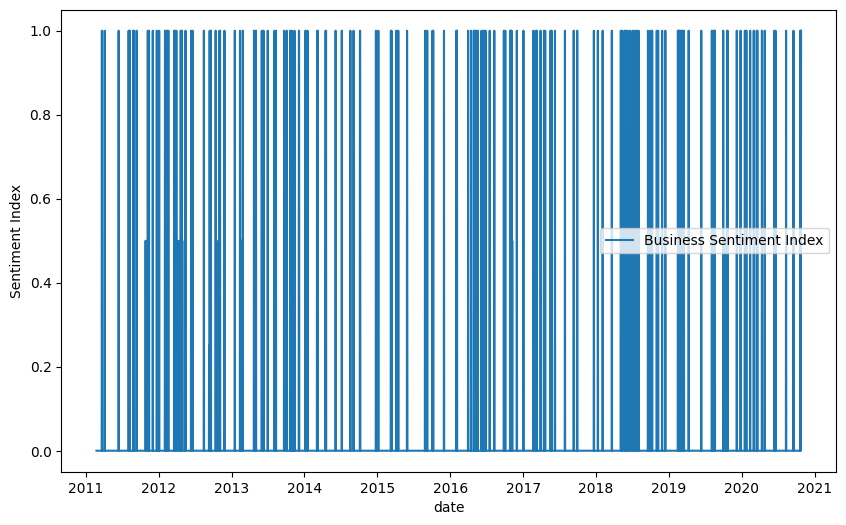

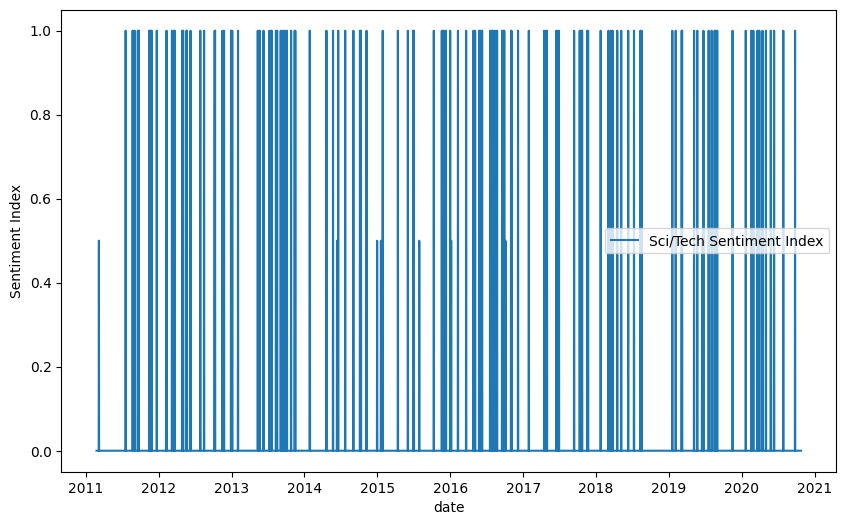

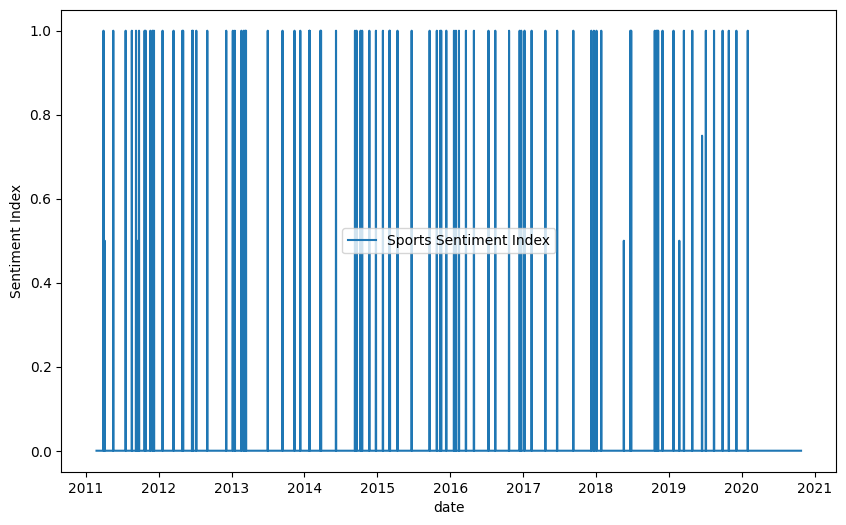

In [47]:
for df, text in pakistan_dfs:
    sns.lineplot(data = df, x = 'date', y = 'Sentiment Index', label = text + ' Sentiment Index')
    plt.show()

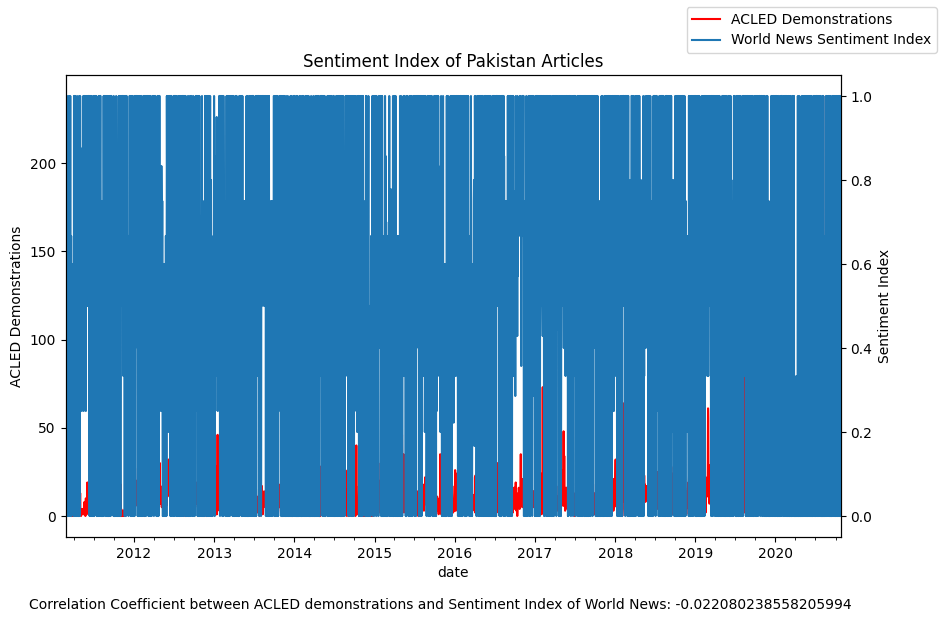

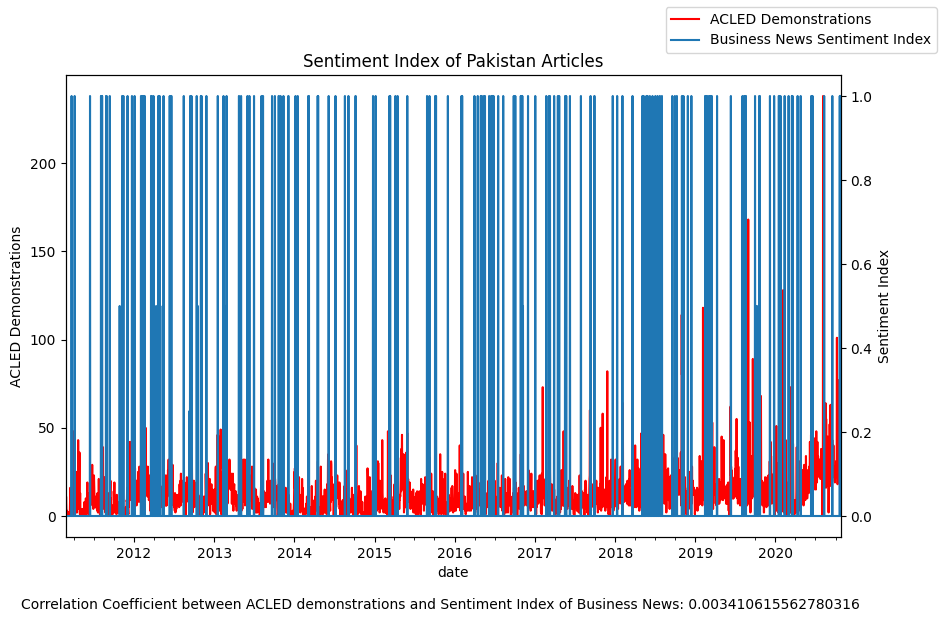

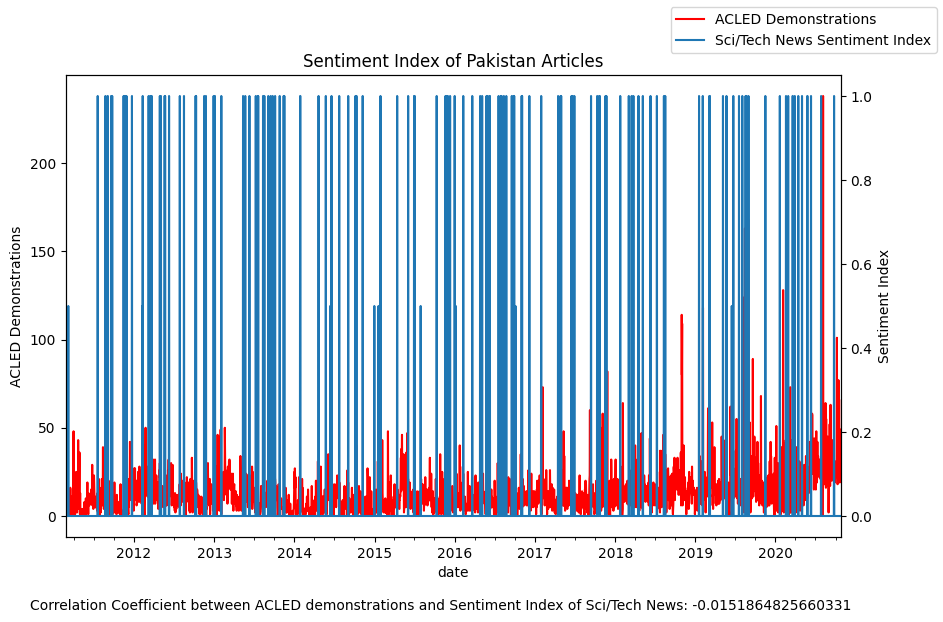

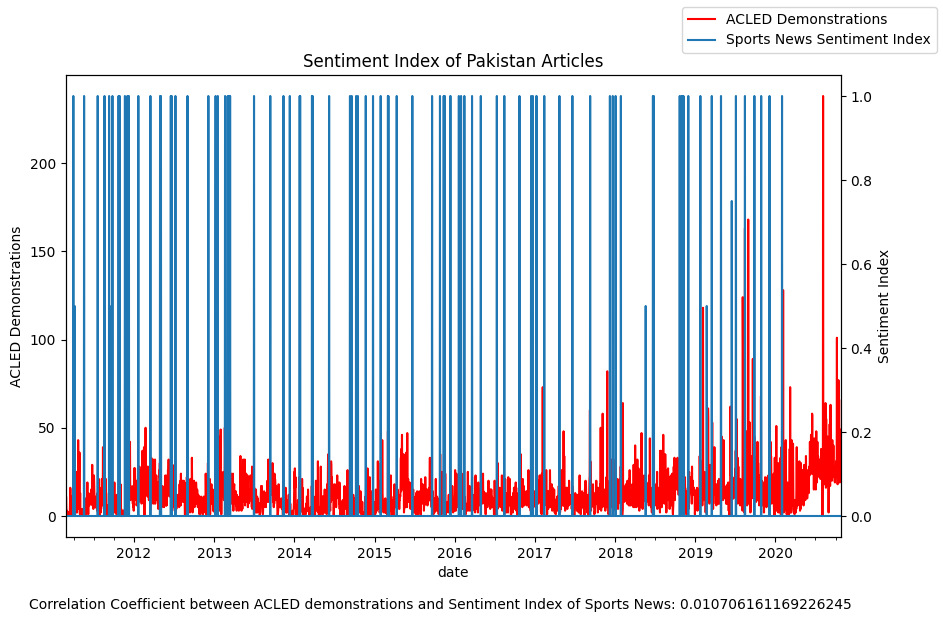

In [48]:
 for df, text in pakistan_dfs:
    ax = pakistan_demonstration_count.plot(y='y', color = 'r', label = 'ACLED Demonstrations', legend = False, figsize = [10,6])
    plt.ylabel('ACLED Demonstrations')

    ax2=ax.twinx()
    plt.plot(df.index,df['Sentiment Index'],label = text + ' News Sentiment Index')
    txt = "Correlation Coefficient between ACLED demonstrations and Sentiment Index of {} News: {}".format(text, df['y'].corr(df['Sentiment Index']))
    plt.ylabel('Sentiment Index')

    ax.figure.legend()
    plt.title('Sentiment Index of Pakistan Articles')
    plt.figtext(0.5, -.01,txt, ha = 'center')
    plt.grid(False)
    plt.show()

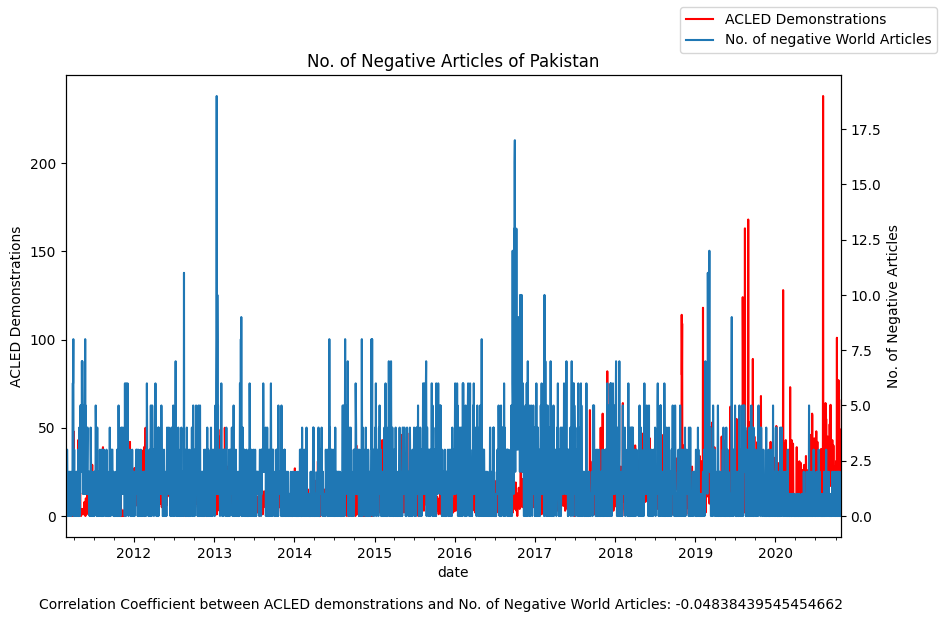

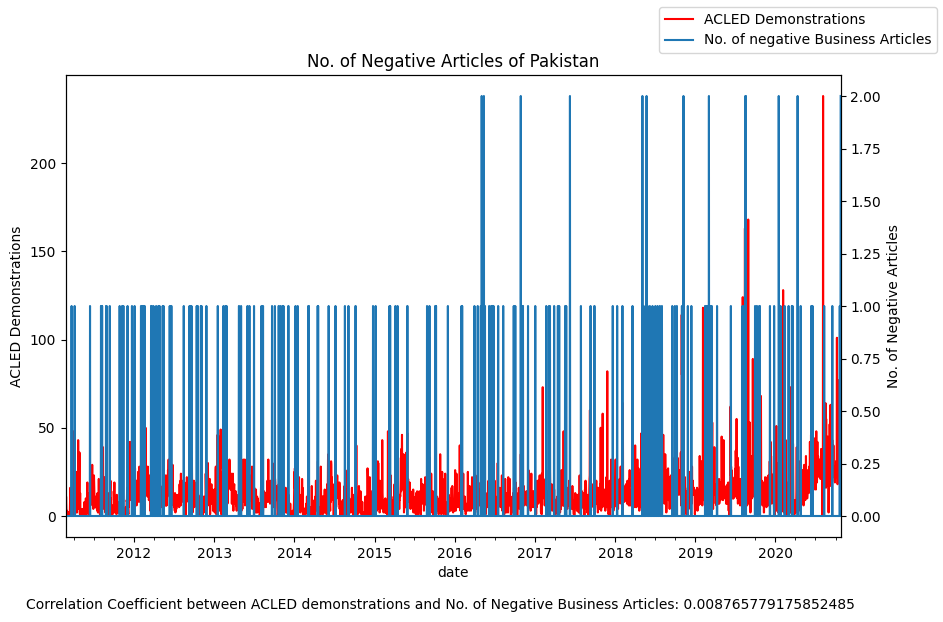

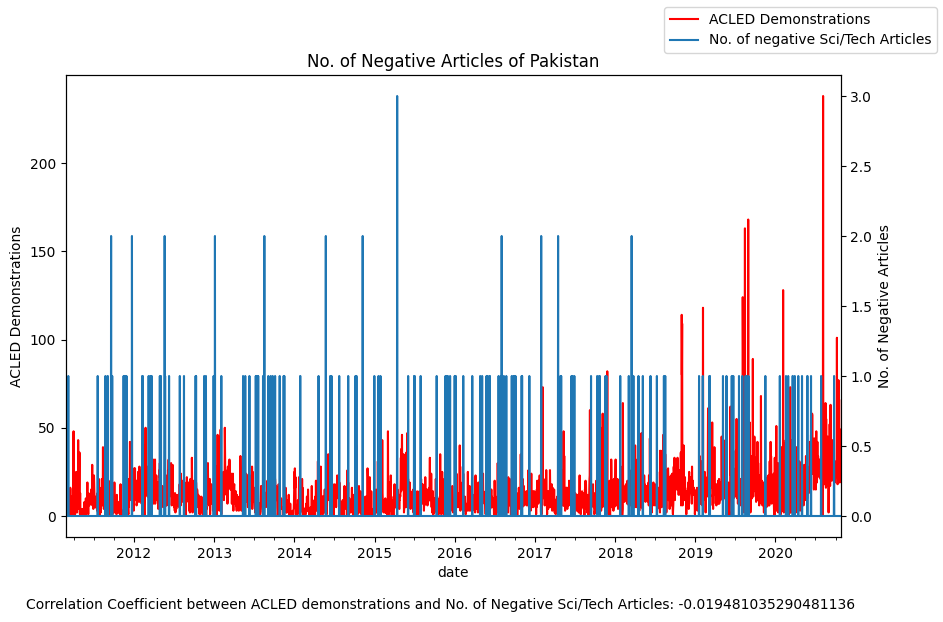

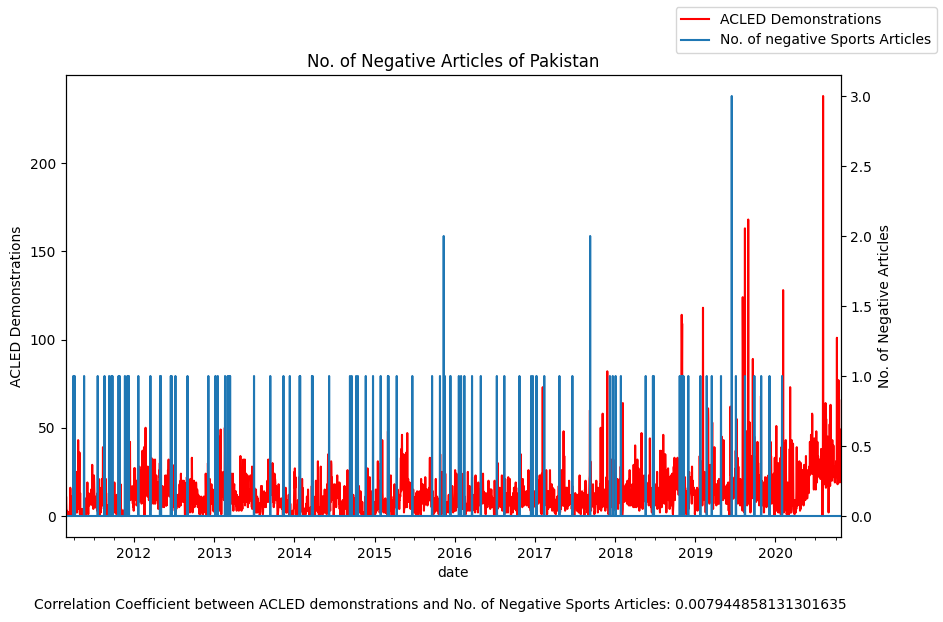

In [49]:
for df, text in pakistan_dfs:
    ax = pakistan_demonstration_count.plot(y='y', color = 'r', label = 'ACLED Demonstrations', legend = False, figsize = [10,6])
    plt.ylabel('ACLED Demonstrations')

    ax2=ax.twinx()
    plt.plot(df.index,df['negative articles'],label = 'No. of negative ' + text + ' Articles')
    txt = "Correlation Coefficient between ACLED demonstrations and No. of Negative {} Articles: {}".format(text, df['y'].corr(df['negative articles']))
    # plt.plot(india_business.index,india_business['Sentiment Index'],label = 'Business News Sentiment Index')
    # plt.plot(india_sci.index,india_sci['Sentiment Index'],label = 'Sci/Tech News Sentiment Index')
    # plt.plot(india_sports.index,india_sports['Sentiment Index'],label = 'Sports News Sentiment Index')
    plt.ylabel('No. of Negative Articles')

    ax.figure.legend()
    plt.title('No. of Negative Articles of Pakistan')
    plt.figtext(0.5, -.01,txt, ha = 'center')
    plt.grid(False)
    plt.show() 


## Data Prep (Bangladesh)

### News Sentiment

In [50]:
# india = pd.read_json('india-news-headlines_IN_features_extracted.json').reset_index(drop = True)
# pakistan = pd.read_json('india-news-headlines_PK_features_extracted.json').reset_index(drop = True)
bangladesh = pd.read_json('india-news-headlines_BD_features_extracted.json').reset_index(drop = True)

In [51]:
bangladesh['total articles'] = 1
bangladesh['negative articles'] = bangladesh['SA tag'].map({'POSITIVE': 0, 'NEGATIVE': 1})
bangladesh['positive articles'] = bangladesh['SA tag'].map({'POSITIVE': 1, 'NEGATIVE': 0})

In [52]:
bangladesh['date'] = pd.to_datetime(bangladesh['date'])

In [53]:
bangladesh['weighted negative'] = bangladesh['SA tag confidence'] * bangladesh['negative articles']
bangladesh['weighted positive'] = bangladesh['SA tag confidence'] * bangladesh['positive articles']

In [54]:
test = bangladesh.groupby(['news tag', pd.Grouper(key = 'date', freq = '1D')]).sum()
test['Sentiment Index'] = test['negative articles'] / test['total articles']
test['Sentiment Index'].fillna(0)

news tag  date      
Business  2011-01-10    1.0
          2011-01-12    0.0
          2011-01-27    1.0
          2011-01-30    1.0
          2011-02-04    1.0
                       ... 
World     2020-12-24    0.0
          2020-12-26    0.0
          2020-12-28    0.0
          2020-12-30    1.0
          2020-12-31    1.0
Name: Sentiment Index, Length: 2653, dtype: float64

In [55]:
print('Number of days with World articles about Bangladesh: {}'.format(test.loc['World'].shape[0]))
print('Number of days with ACLED records on Bangladesh: {}'.format(bangladesh_demonstration_count.shape[0]))

# A lot more days with no world articles compared to days without ACLED records.

Number of days with World articles about Bangladesh: 1998
Number of days with ACLED records on Bangladesh: 3531


In [56]:
bangladesh_visualise_world = (pd.merge(test.loc['World'].asfreq('D'), bangladesh_demonstration_count, left_index=True, right_index=True)).fillna(0)
bangladesh_visualise_business = (pd.merge(test.loc['Business'].asfreq('D'), bangladesh_demonstration_count, left_index=True, right_index=True)).fillna(0)
bangladesh_visualise_sci = (pd.merge(test.loc['Sci/Tech'].asfreq('D'), bangladesh_demonstration_count, left_index=True, right_index=True)).fillna(0)
bangladesh_visualise_sports = (pd.merge(test.loc['Sports'].asfreq('D'), bangladesh_demonstration_count, left_index=True, right_index=True)).fillna(0)

In [57]:
bangladesh_dfs = [[bangladesh_visualise_world, 'World'], [bangladesh_visualise_business, 'Business'], [bangladesh_visualise_sci, 'Sci/Tech'], [bangladesh_visualise_sports, 'Sports']]

## Graphs (Bangladesh)

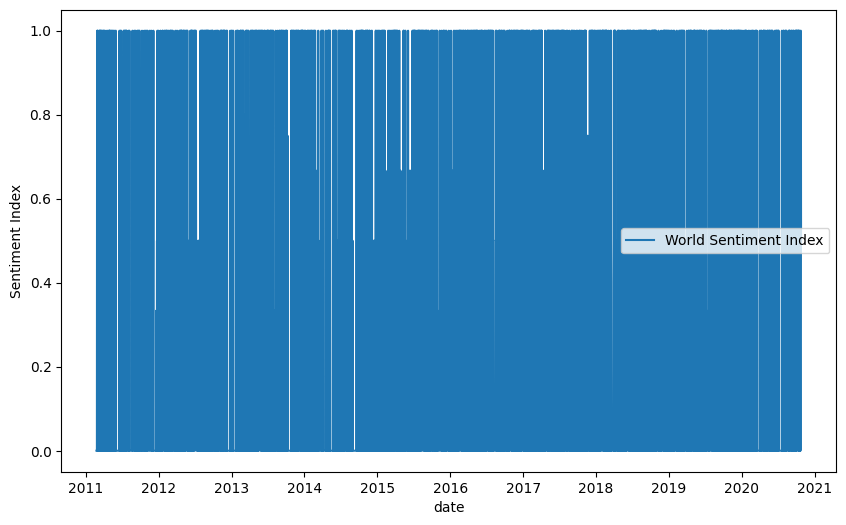

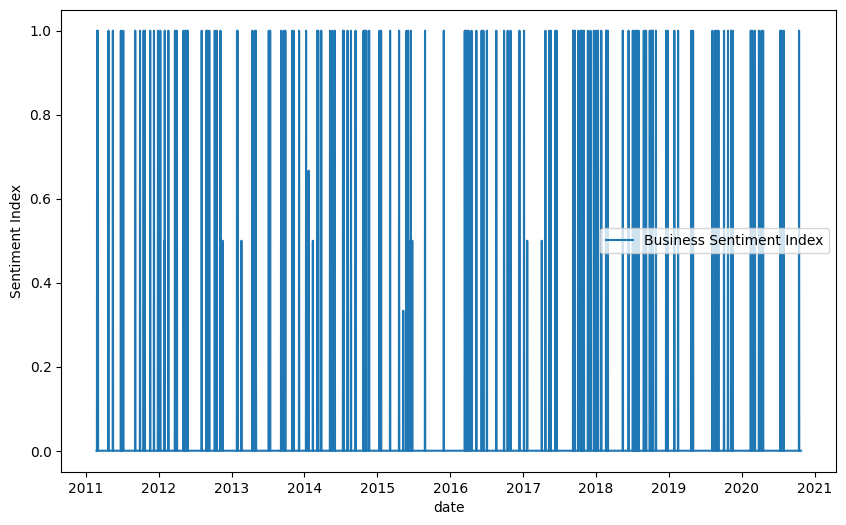

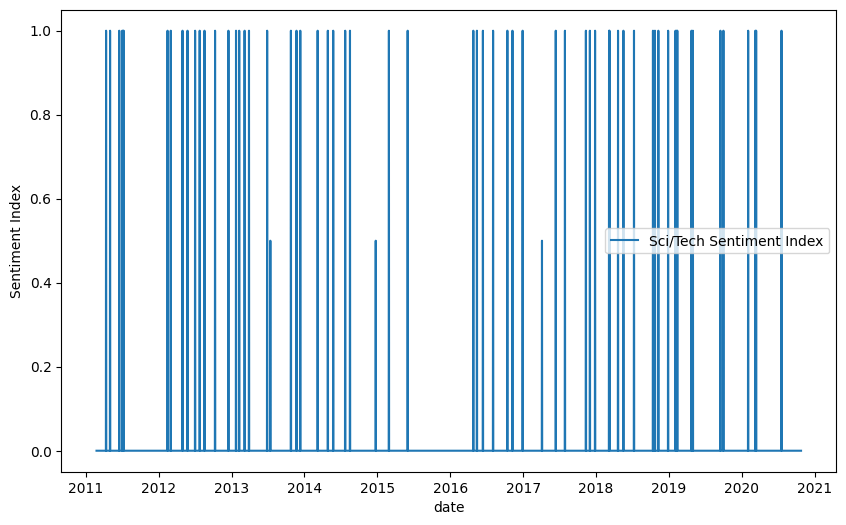

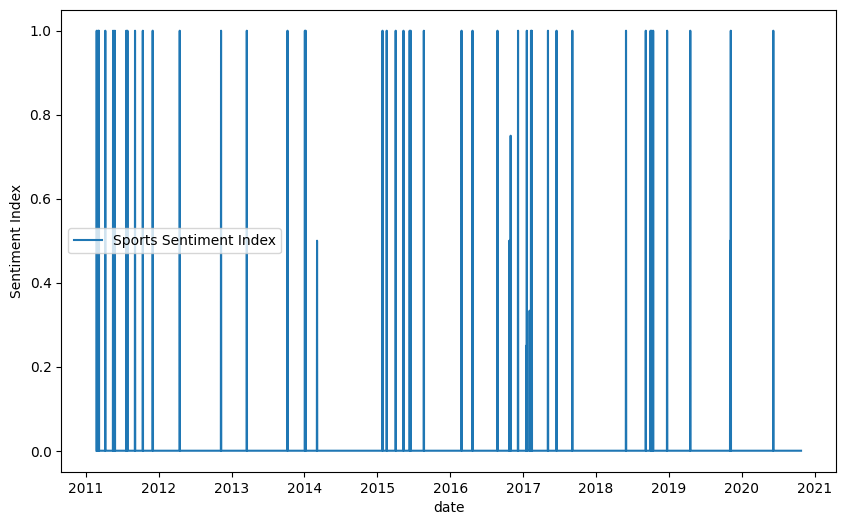

In [58]:
 for df, text in bangladesh_dfs:
    sns.lineplot(data = df, x = 'date', y = 'Sentiment Index', label = text + ' Sentiment Index')
    plt.show()

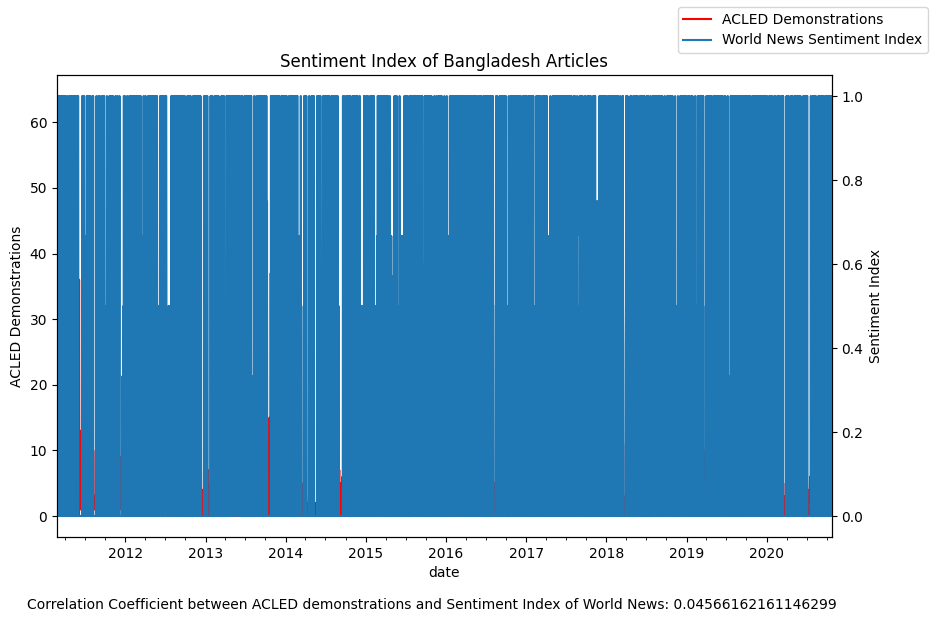

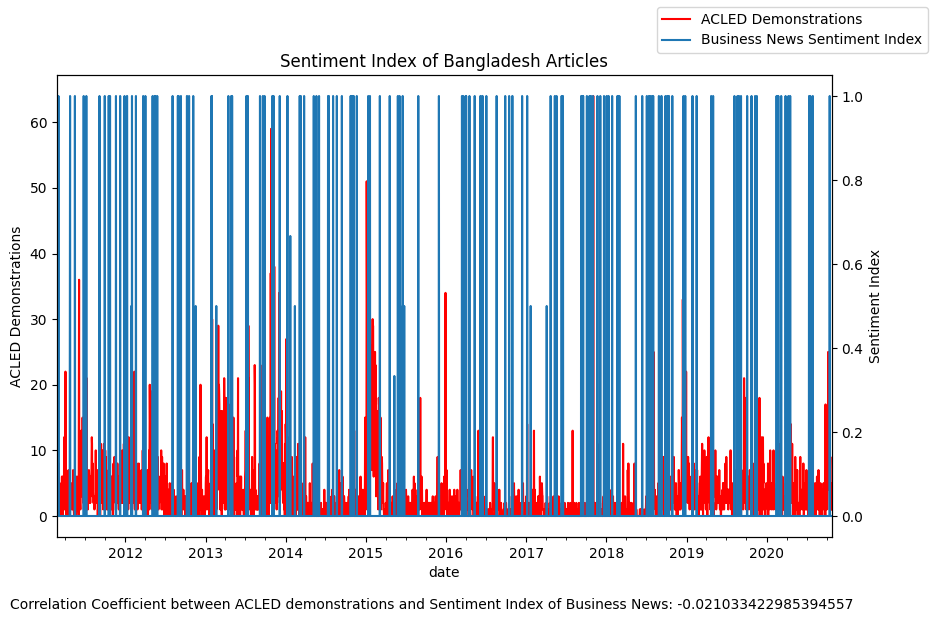

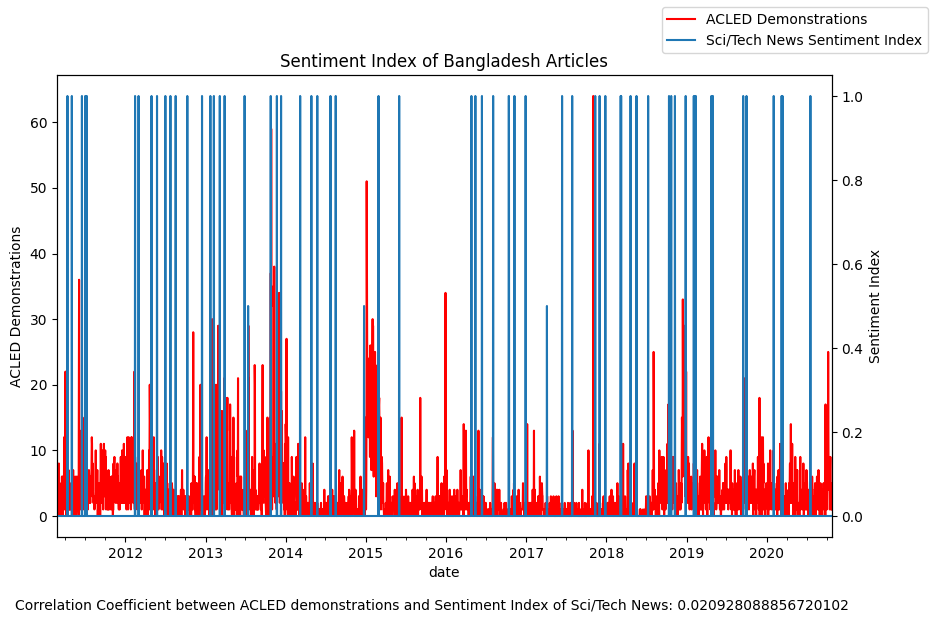

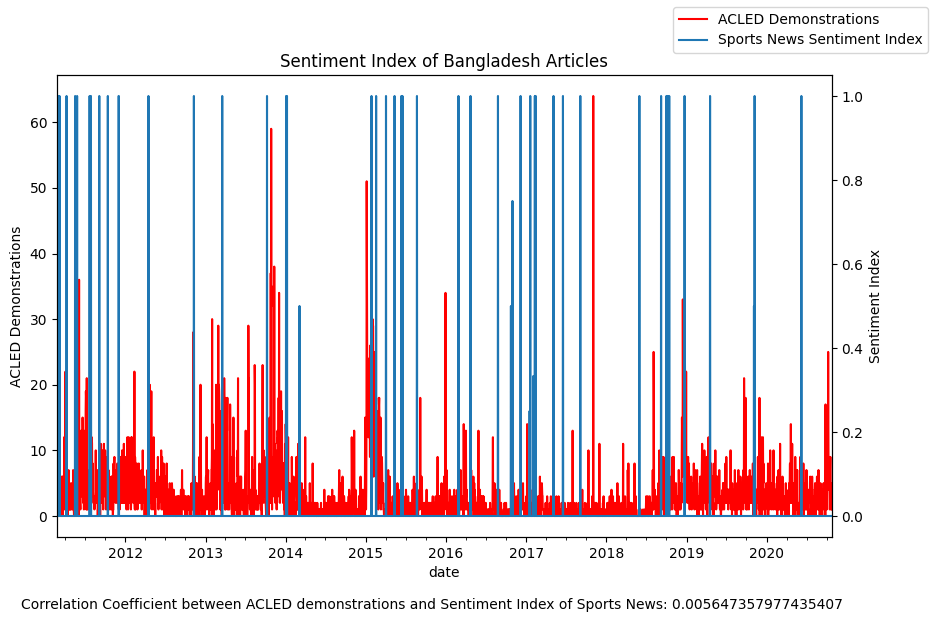

In [59]:
for df, text in bangladesh_dfs:
    ax = bangladesh_demonstration_count.plot(y='y', color = 'r', label = 'ACLED Demonstrations', legend = False, figsize = [10,6])
    plt.ylabel('ACLED Demonstrations')

    ax2=ax.twinx()
    plt.plot(df.index,df['Sentiment Index'],label = text + ' News Sentiment Index')
    txt = "Correlation Coefficient between ACLED demonstrations and Sentiment Index of {} News: {}".format(text, df['y'].corr(df['Sentiment Index']))
    plt.ylabel('Sentiment Index')

    ax.figure.legend()
    plt.title('Sentiment Index of Bangladesh Articles')
    plt.figtext(0.5, -.01,txt, ha = 'center')
    plt.grid(False)
    plt.show()

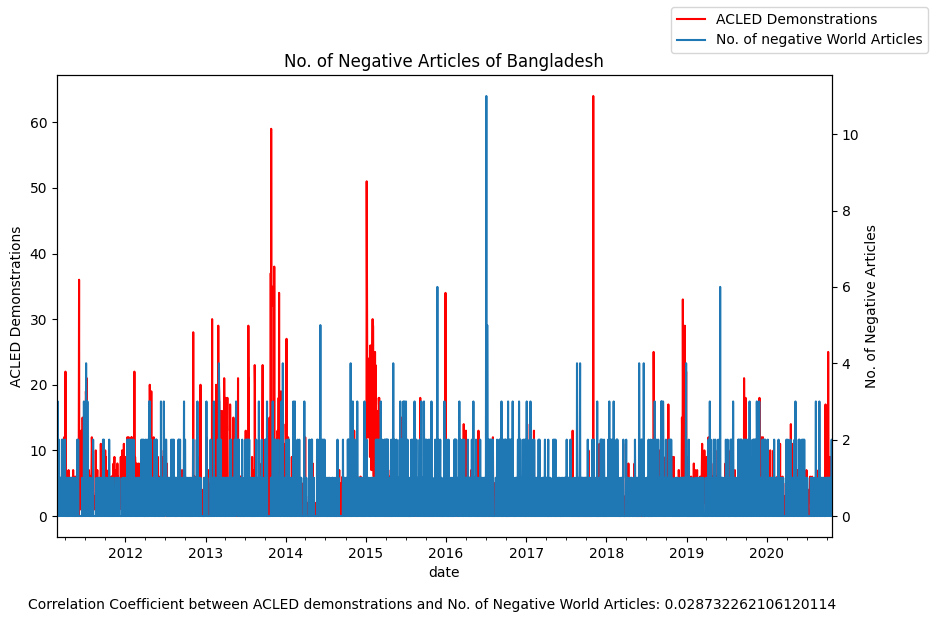

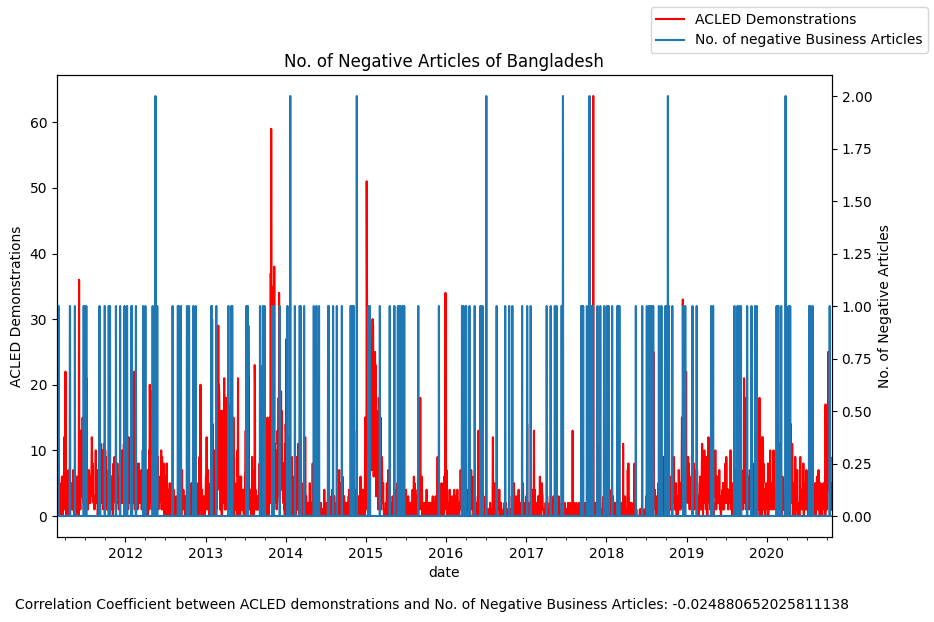

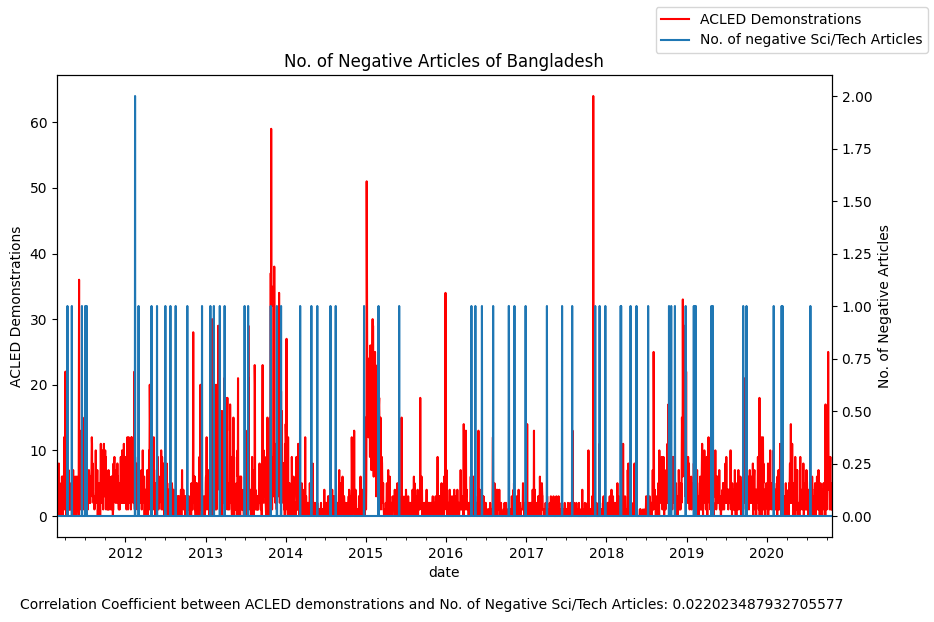

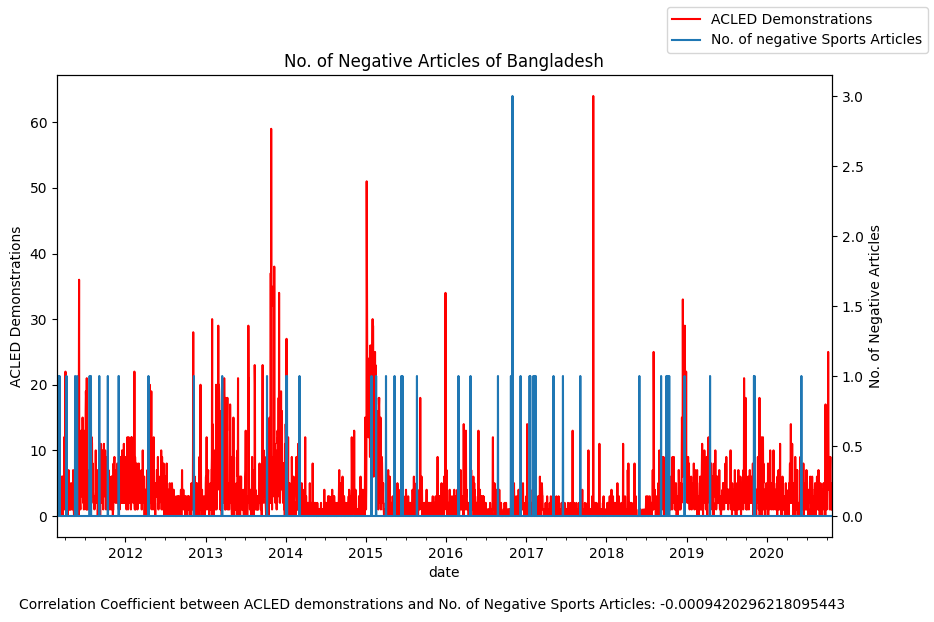

In [60]:
for df, text in bangladesh_dfs:
    ax = bangladesh_demonstration_count.plot(y='y', color = 'r', label = 'ACLED Demonstrations', legend = False, figsize = [10,6])
    plt.ylabel('ACLED Demonstrations')

    ax2=ax.twinx()
    plt.plot(df.index,df['negative articles'],label = 'No. of negative ' + text + ' Articles')
    txt = "Correlation Coefficient between ACLED demonstrations and No. of Negative {} Articles: {}".format(text, df['y'].corr(df['negative articles']))
    plt.ylabel('No. of Negative Articles')

    ax.figure.legend()
    plt.title('No. of Negative Articles of Bangladesh')
    plt.figtext(0.5, -.01,txt, ha = 'center')
    plt.grid(False)
    plt.show() 
